In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm
from scipy import stats

In [ ]:
train_data = pd.read_excel("E:\\Final Dataset.xlsx")



In [ ]:
test_data = pd.read_excel("E:\\Validation_Dataset.xlsx")

In [ ]:
train_data.head(10) 

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173
5,PROD_5,SLSMAN_1,12,2019,240,175
6,PROD_8,SLSMAN_1,10,2019,0,7
7,PROD_10,SLSMAN_1,10,2019,0,82
8,PROD_10,SLSMAN_1,11,2019,0,79
9,PROD_10,SLSMAN_1,12,2019,0,59


In [ ]:
train_data.shape

(22469, 6)

In [ ]:
train_data.columns

Index(['PROD_CD', 'SLSMAN_CD', 'PLAN_MONTH', 'PLAN_YEAR', 'TARGET_IN_EA',
       'ACH_IN_EA'],
      dtype='object')

In [ ]:
train_data.dtypes 

PROD_CD         object
SLSMAN_CD       object
PLAN_MONTH       int64
PLAN_YEAR        int64
TARGET_IN_EA     int64
ACH_IN_EA        int64
dtype: object

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22469 entries, 0 to 22468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PROD_CD       22469 non-null  object
 1   SLSMAN_CD     22469 non-null  object
 2   PLAN_MONTH    22469 non-null  int64 
 3   PLAN_YEAR     22469 non-null  int64 
 4   TARGET_IN_EA  22469 non-null  int64 
 5   ACH_IN_EA     22469 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.0+ MB


#checking for the null values

In [ ]:
train_data.isnull() 


,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
22464,False,False,False,False,False,False
22465,False,False,False,False,False,False
22466,False,False,False,False,False,False
22467,False,False,False,False,False,False


In [ ]:
train_data.isnull().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

In [ ]:
train_data.drop_duplicates(keep='first',inplace=True)   


In [ ]:
train_data.columns

Index(['PROD_CD', 'SLSMAN_CD', 'PLAN_MONTH', 'PLAN_YEAR', 'TARGET_IN_EA',
       'ACH_IN_EA'],
      dtype='object')

In [ ]:
test_data.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,0
1,PROD_5,SLSMAN_1,1,2020,240,0
2,PROD_11,SLSMAN_1,1,2020,360,0
3,PROD_13,SLSMAN_1,1,2020,12816,0
4,PROD_14,SLSMAN_1,1,2020,44460,0
5,PROD_15,SLSMAN_1,1,2020,15012,0
6,PROD_16,SLSMAN_1,1,2020,2268,0
7,PROD_17,SLSMAN_1,1,2020,22320,0
8,PROD_18,SLSMAN_1,1,2020,9300,0
9,PROD_19,SLSMAN_1,1,2020,19320,0


In [ ]:
test_data.shape

(5839, 6)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PROD_CD       5839 non-null   object
 1   SLSMAN_CD     5839 non-null   object
 2   PLAN_MONTH    5839 non-null   int64 
 3   PLAN_YEAR     5839 non-null   int64 
 4   TARGET_IN_EA  5839 non-null   int64 
 5   ACH_IN_EA     5839 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 273.8+ KB


In [ ]:
test_data.keys()

Index(['PROD_CD', 'SLSMAN_CD', 'PLAN_MONTH', 'PLAN_YEAR', 'TARGET_IN_EA',
       'ACH_IN_EA'],
      dtype='object')

In [ ]:
test_data.dtypes

PROD_CD         object
SLSMAN_CD       object
PLAN_MONTH       int64
PLAN_YEAR        int64
TARGET_IN_EA     int64
ACH_IN_EA        int64
dtype: object

**ENCODING**

In [ ]:
train_data['PROD_CD'] = train_data['PROD_CD'].str.replace(r'\D', '').astype(int)

In [ ]:
train_data['SLSMAN_CD'] = train_data['SLSMAN_CD'].str.replace(r'\D', '').astype(int)

In [ ]:
train_data.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,3,1,10,2019,80,0
1,3,1,11,2019,80,0
2,3,1,12,2019,40,0
3,5,1,10,2019,160,211
4,5,1,11,2019,160,173


In [ ]:
test_data['PROD_CD'] = test_data['PROD_CD'].str.replace(r'\D', '').astype(int)


In [ ]:
test_data['SLSMAN_CD'] = test_data['SLSMAN_CD'].str.replace(r'\D', '').astype(int)

In [ ]:
test_data.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,3,1,1,2020,40,0
1,5,1,1,2020,240,0
2,11,1,1,2020,360,0
3,13,1,1,2020,12816,0
4,14,1,1,2020,44460,0


In [ ]:
train_data.dtypes  

PROD_CD         int32
SLSMAN_CD       int32
PLAN_MONTH      int64
PLAN_YEAR       int64
TARGET_IN_EA    int64
ACH_IN_EA       int64
dtype: object

In [ ]:
test_data.dtypes

PROD_CD         int32
SLSMAN_CD       int32
PLAN_MONTH      int64
PLAN_YEAR       int64
TARGET_IN_EA    int64
ACH_IN_EA       int64
dtype: object

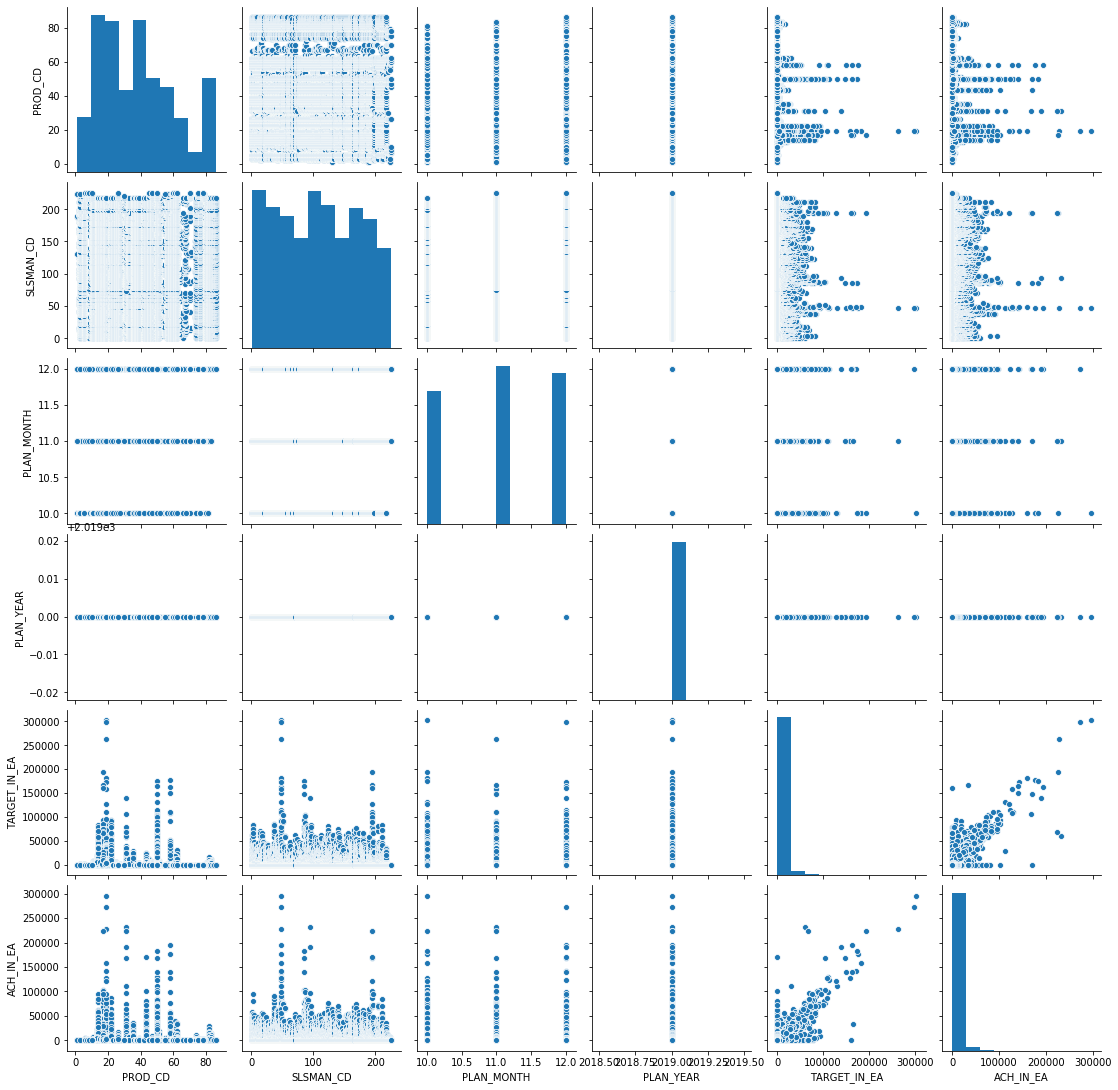

In [ ]:
sns.pairplot((train_data))

In [ ]:
train_data.corr()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
PROD_CD,1.000000,0.002740,0.064444,NaN,-0.048965,-0.027820
SLSMAN_CD,0.002740,1.000000,0.011546,NaN,-0.022989,-0.012823
PLAN_MONTH,0.064444,0.011546,1.000000,NaN,-0.028070,-0.022074
PLAN_YEAR,NaN,NaN,NaN,NaN,NaN,NaN
TARGET_IN_EA,-0.048965,-0.022989,-0.028070,NaN,1.000000,0.884784
ACH_IN_EA,-0.027820,-0.012823,-0.022074,NaN,0.884784,1.000000


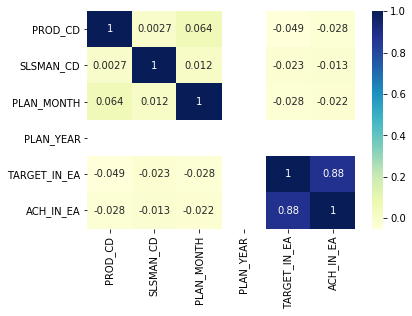

In [ ]:
corr=train_data.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

#by heatmap we can see that target and achivement have good correlation that is 0.88 and month and year do not have good correlation 

In [ ]:
train_data.groupby(['PROD_CD','PLAN_MONTH'])['PROD_CD'].count()

PROD_CD  PLAN_MONTH
1        10              3
         11              4
         12              3
2        10             29
         11             30
                      ... 
83       11            181
         12            186
84       12            126
85       12            114
86       12            160
Name: PROD_CD, Length: 234, dtype: int64

In [ ]:
train_data.groupby(['SLSMAN_CD','PLAN_MONTH'])['SLSMAN_CD'].count()

SLSMAN_CD  PLAN_MONTH
1          10            39
           11            43
           12            42
2          10            33
           11            38
                         ..
223        12            20
224        11            16
           12            17
225        11            13
           12            12
Name: SLSMAN_CD, Length: 598, dtype: int64

**Moments of business decision**

**1.measures of central tendency**

*finding mean

In [ ]:
np.mean(train_data.PROD_CD)  

38.11700565223197

In [ ]:
np.mean(train_data.SLSMAN_CD) 

107.72121589745872

In [ ]:
np.mean(train_data.PLAN_MONTH)

11.039743646802261

In [ ]:
np.mean(train_data.PLAN_YEAR)

2019.0

In [ ]:
np.mean(train_data.TARGET_IN_EA)

3790.074057590458

In [ ]:
np.mean(train_data.ACH_IN_EA) 

3714.193244025101

finding median

In [ ]:
np.median(train_data.PROD_CD)  

36.0

In [ ]:
np.median(train_data.SLSMAN_CD) 

107.0

In [ ]:
np.median(train_data.PLAN_MONTH)

11.0

In [ ]:
np.median(train_data.PLAN_YEAR)

2019.0

In [ ]:
np.median(train_data.TARGET_IN_EA)

252.0

In [ ]:
np.median(train_data.ACH_IN_EA)

323.0

**2.measures of dispersion**

In [ ]:
np.std(train_data) 

PROD_CD            22.603740
SLSMAN_CD          63.751754
PLAN_MONTH          0.800872
PLAN_YEAR           0.000000
TARGET_IN_EA    10792.409647
ACH_IN_EA       10608.728786
dtype: float64

In [ ]:
np.var(train_data)

PROD_CD         5.109291e+02
SLSMAN_CD       4.064286e+03
PLAN_MONTH      6.413952e-01
PLAN_YEAR       0.000000e+00
TARGET_IN_EA    1.164761e+08
ACH_IN_EA       1.125451e+08
dtype: float64

**3.skewness**

In [ ]:
skew(train_data)

array([ 0.47830431,  0.02954211, -0.07162753,  0.        ,  7.60793029,
        8.1670374 ])

**4.kurtosis**

In [ ]:
kurtosis(train_data)

array([ -0.73021533,  -1.18116754,  -1.43762327,  -3.        ,
       112.04186409, 123.68930108])

Text(0, 0.5, 'Frequency')

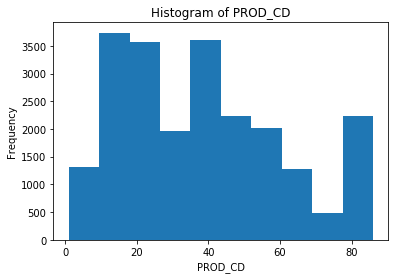

In [ ]:
plt.hist(train_data['PROD_CD']);
plt.title('Histogram of PROD_CD'); 
plt.xlabel('PROD_CD');
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

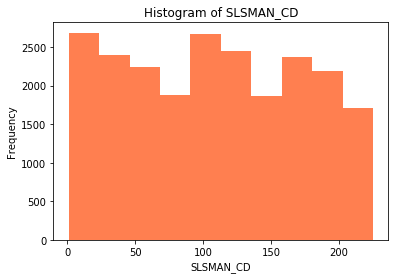

In [ ]:
plt.hist(train_data['SLSMAN_CD'], color = 'coral');
plt.title('Histogram of SLSMAN_CD');
plt.xlabel('SLSMAN_CD');
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

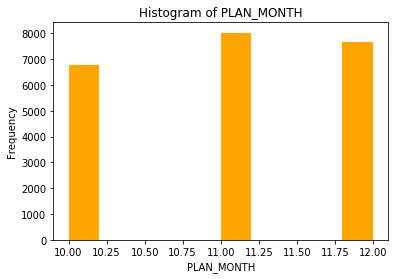

In [ ]:
plt.hist(train_data['PLAN_MONTH'], color= 'orange');
plt.title('Histogram of PLAN_MONTH'); 
plt.xlabel('PLAN_MONTH');
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

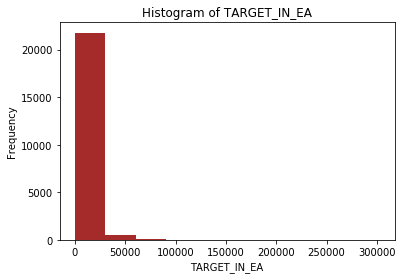

In [ ]:
plt.hist(train_data['TARGET_IN_EA'], color= 'brown');
plt.title('Histogram of TARGET_IN_EA');
plt.xlabel('TARGET_IN_EA');
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

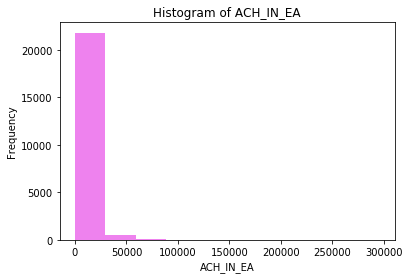

In [ ]:
plt.hist(train_data['ACH_IN_EA'], color = 'violet');
plt.title('Histogram of ACH_IN_EA'); 
plt.xlabel('ACH_IN_EA'); 
plt.ylabel('Frequency')

#boxplot

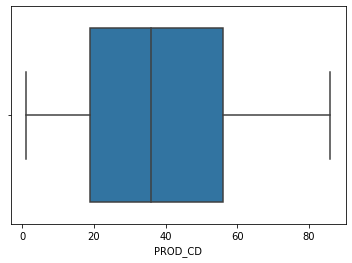

In [ ]:
sns.boxplot(train_data["PROD_CD"])

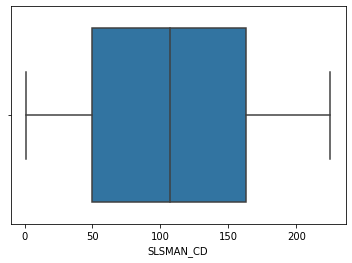

In [ ]:
sns.boxplot(train_data["SLSMAN_CD"])

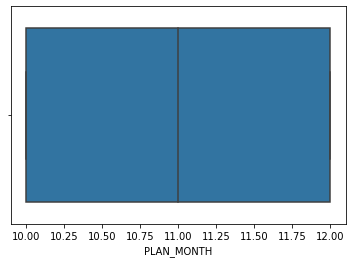

In [ ]:
sns.boxplot(train_data["PLAN_MONTH"])

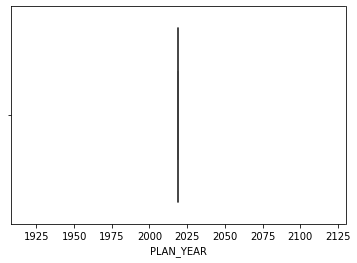

In [ ]:
sns.boxplot(train_data["PLAN_YEAR"])

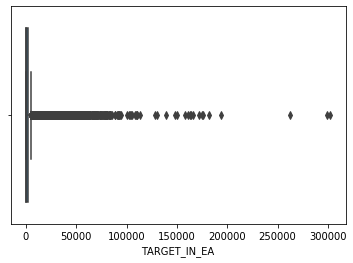

In [ ]:
sns.boxplot(train_data["TARGET_IN_EA"])

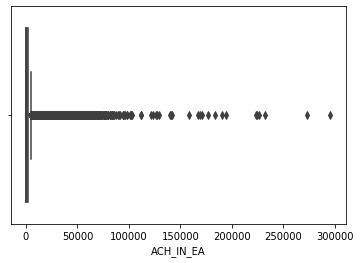

In [ ]:
sns.boxplot(train_data["ACH_IN_EA"])

Text(0.5, 1.0, 'Scatterplot of ACH_IN_EA & PROD_CD')

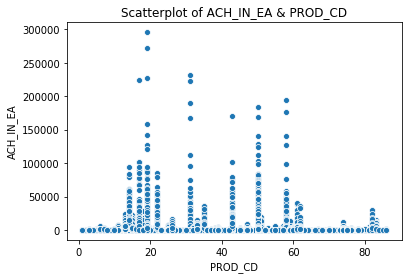

In [ ]:
sns.scatterplot(x='PROD_CD', y='ACH_IN_EA', data=train_data).set_title('Scatterplot of ACH_IN_EA & PROD_CD')

Text(0.5, 1.0, 'Scatterplot of ACH_IN_EA & SLSMAN_CD')

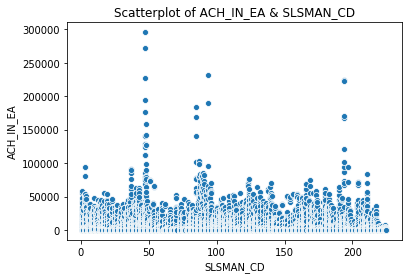

In [ ]:
sns.scatterplot(x='SLSMAN_CD', y='ACH_IN_EA', data=train_data).set_title('Scatterplot of ACH_IN_EA & SLSMAN_CD')

Text(0.5, 1.0, 'Scatterplot of ACH_IN_EA & PLAN_MONTH')

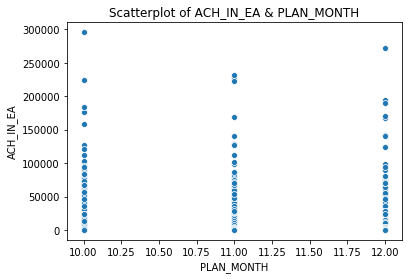

In [ ]:
sns.scatterplot(x='PLAN_MONTH', y='ACH_IN_EA', data=train_data).set_title('Scatterplot of ACH_IN_EA & PLAN_MONTH')

Text(0.5, 1.0, 'Scatterplot of ACH_IN_EA & PLAN_YEAR')

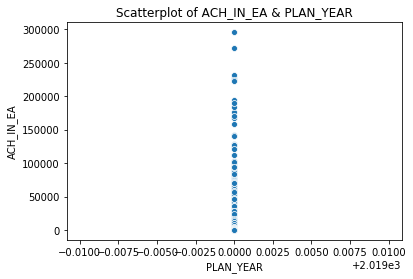

In [ ]:
sns.scatterplot(x='PLAN_YEAR', y='ACH_IN_EA', data=train_data).set_title('Scatterplot of ACH_IN_EA & PLAN_YEAR')

Text(0.5, 1.0, 'Scatterplot of ACH_IN_EA & TARGET_IN_EA')

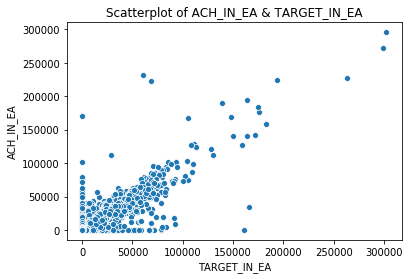

In [ ]:
sns.scatterplot(x='TARGET_IN_EA', y='ACH_IN_EA', data=train_data).set_title('Scatterplot of ACH_IN_EA & TARGET_IN_EA')

In [ ]:
df = pd.DataFrame(train_data)

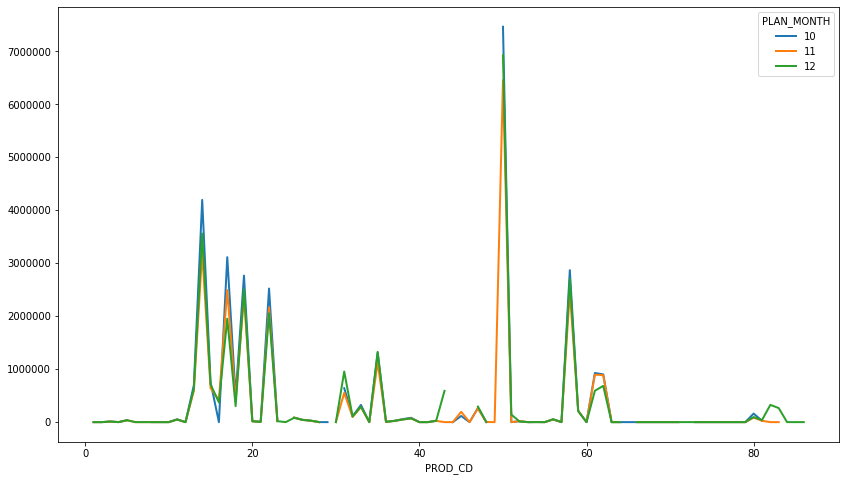

In [ ]:
fig= df.groupby(['PROD_CD','PLAN_MONTH'])['TARGET_IN_EA'].sum().unstack().plot(figsize =(14,8),linewidth = 2)

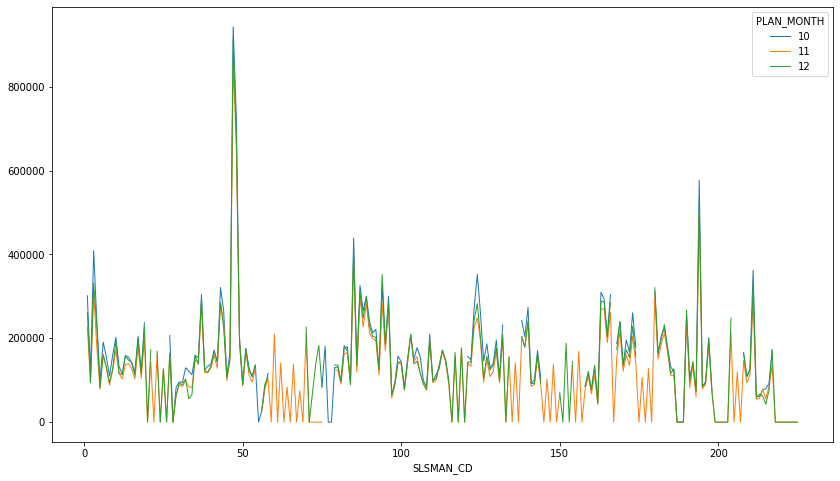

In [ ]:
fig= df.groupby(['SLSMAN_CD','PLAN_MONTH'])['TARGET_IN_EA'].sum().unstack().plot(figsize =(14,8),linewidth = 1)

In [ ]:
prod = np.array(train_data['PROD_CD'])
salesman = np.array(train_data['SLSMAN_CD'])
month = np.array(train_data['PLAN_MONTH'])
year = np.array(train_data['PLAN_YEAR'])
target = np.array(train_data['TARGET_IN_EA'])
achieved = np.array(train_data['ACH_IN_EA'])


Text(0.5, 1.0, 'Normal Probability Distribution of achieved')

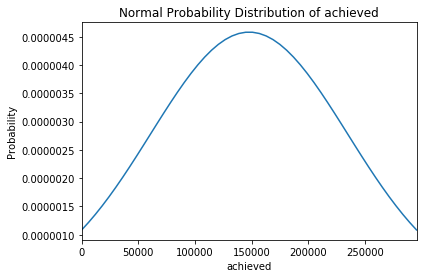

In [ ]:
x_ach = np.linspace(np.min(achieved), np.max(achieved))
y_ach = stats.norm.pdf(x_ach, np.mean(x_ach), np.std(x_ach))
plt.plot(x_ach, y_ach,); 
plt.xlim(np.min(x_ach), np.max(x_ach));
plt.xlabel('achieved');
plt.ylabel('Probability');
plt.title('Normal Probability Distribution of achieved')

Text(0.5, 1.0, 'Normal Probability Distribution of prod_cd')

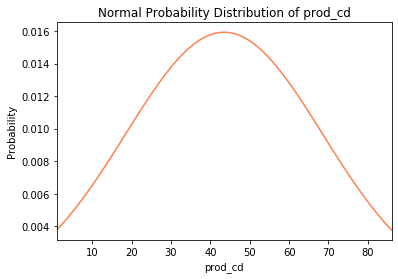

In [ ]:
x_prod = np.linspace(np.min(prod), np.max(prod))
y_prod = stats.norm.pdf(x_prod, np.mean(x_prod), np.std(x_prod))
plt.plot(x_prod, y_prod, color = 'coral');
plt.xlim(np.min(x_prod), np.max(x_prod));
plt.xlabel('prod_cd');
plt.ylabel('Probability');
plt.title('Normal Probability Distribution of prod_cd')


Text(0.5, 1.0, 'Normal Probability Distribution of sales_cd')

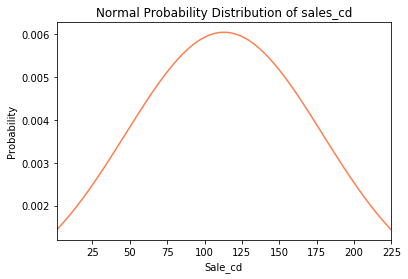

In [ ]:
x_sale = np.linspace(np.min(salesman), np.max(salesman))
y_sale = stats.norm.pdf(x_sale, np.mean(x_sale), np.std(x_sale))
plt.plot(x_sale, y_sale, color = 'coral'); 
plt.xlim(np.min(x_sale), np.max(x_sale));
plt.xlabel('Sale_cd');
plt.ylabel('Probability');
plt.title('Normal Probability Distribution of sales_cd')


Text(0.5, 1.0, 'Normal Probability Distribution of target')

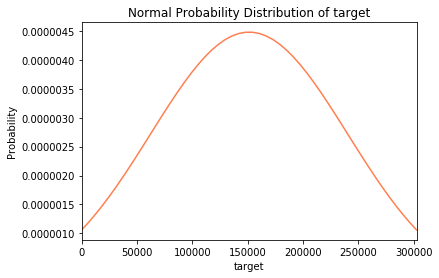

In [ ]:
x_target = np.linspace(np.min(target), np.max(target))
y_target = stats.norm.pdf(x_target, np.mean(x_target), np.std(x_target))
plt.plot(x_target, y_target, color = 'coral'); 
plt.xlim(np.min(x_target), np.max(x_target));
plt.xlabel('target');
plt.ylabel('Probability');
plt.title('Normal Probability Distribution of target')
